### Airbnb EDA:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab

import airbnb_pipeline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
pwd

'/Users/alexpapiu/Documents/Insight/Project/airbnb'

In [7]:
train = pd.read_csv("/Users/alexpapiu/Documents/Insight/Project/Data/new-york-city_2016-12-03_data_listings.csv")

In [4]:
train.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,685006,https://www.airbnb.com/rooms/685006,20161203092247,2016-12-04,Best Studio on Prospect Park,Perfect studio for couples or individuals look...,THE SPACE: The apartment is a good sized studi...,Perfect studio for couples or individuals look...,none,The apartment is right across the street from ...,...,9.0,f,NaN,NaN,f,strict,f,f,1,2.87
1,9461238,https://www.airbnb.com/rooms/9461238,20161203092247,2016-12-04,1 bedrms Williamsburg 1st Stop L,Very well located 1 bedroom apt on the South o...,The apartment is yours for your stay; it has t...,Very well located 1 bedroom apt on the South o...,none,"Prime Williamsburg, the hot South side: Steps ...",...,9.0,f,NaN,NaN,f,strict,f,f,1,4.27
2,4873690,https://www.airbnb.com/rooms/4873690,20161203092247,2016-12-04,"Private room, 10min to Times Square",This 2br apartment in LIC offers a private bed...,UPDATE: My apartment was recently featured in ...,This 2br apartment in LIC offers a private bed...,none,"Long Island City is the ultimate, in my mind, ...",...,9.0,f,NaN,NaN,f,flexible,f,f,1,1.81
3,12738047,https://www.airbnb.com/rooms/12738047,20161203092247,2016-12-04,clean and tidy separated livingroom,It is the living room separated in an 2b1b apa...,NaN,It is the living room separated in an 2b1b apa...,none,NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
4,15359479,https://www.airbnb.com/rooms/15359479,20161203092247,2016-12-04,Awesome One Bedroom Gramercy Park,"Dear Guest, Welcome to New York! Thanks for vi...",[Details] I'll let the pictures speak for the...,"Dear Guest, Welcome to New York! Thanks for vi...",none,NaN,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.00


In [5]:
train.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
train = airbnb_pipeline.clean(train)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
train.shape

(39661, 95)

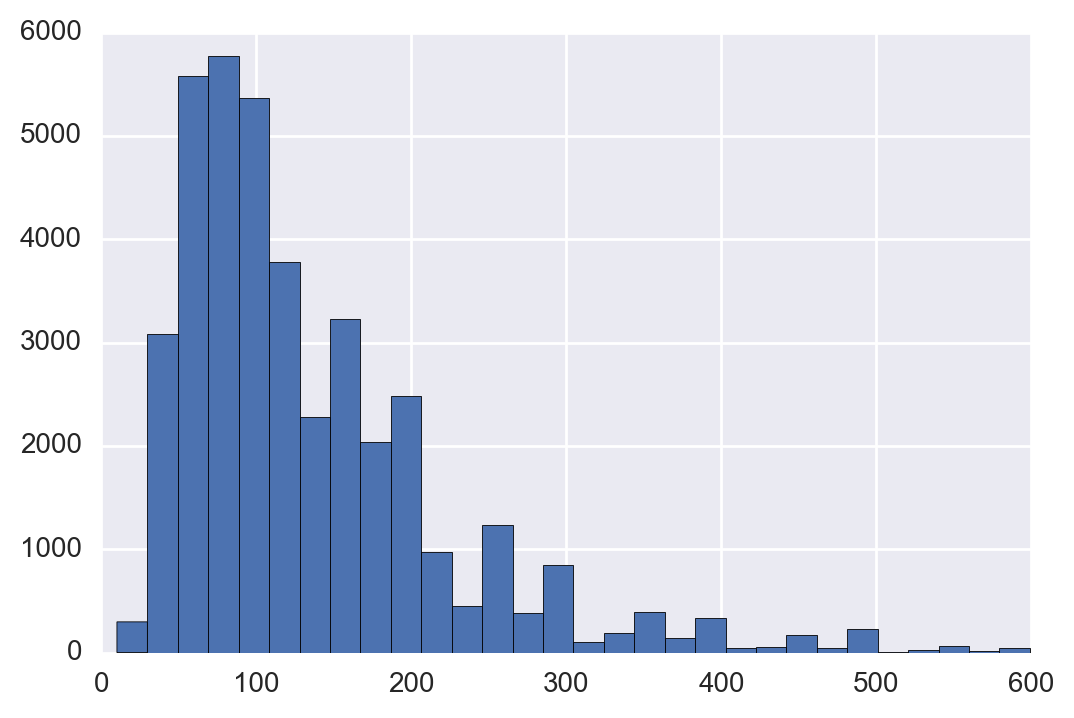

In [11]:
train["price"].hist(bins = 30)

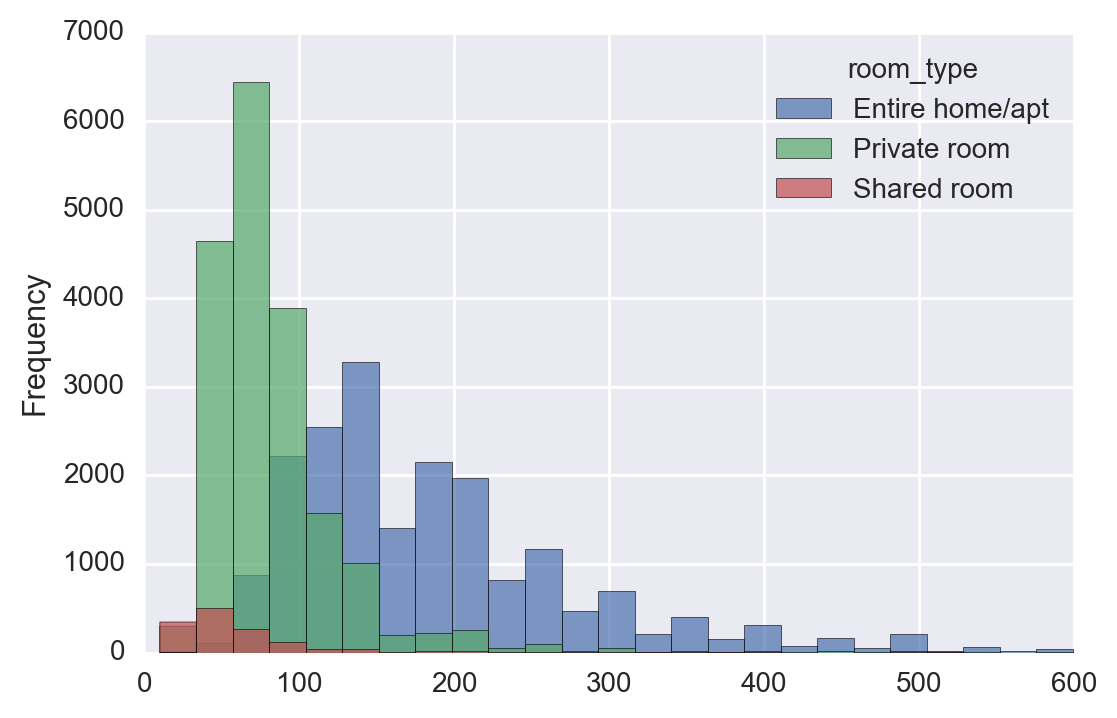

In [12]:
plot = (train.pivot(columns = "room_type", values = "price")
         .plot.hist(bins = 25, stacked = False, alpha = 0.7))

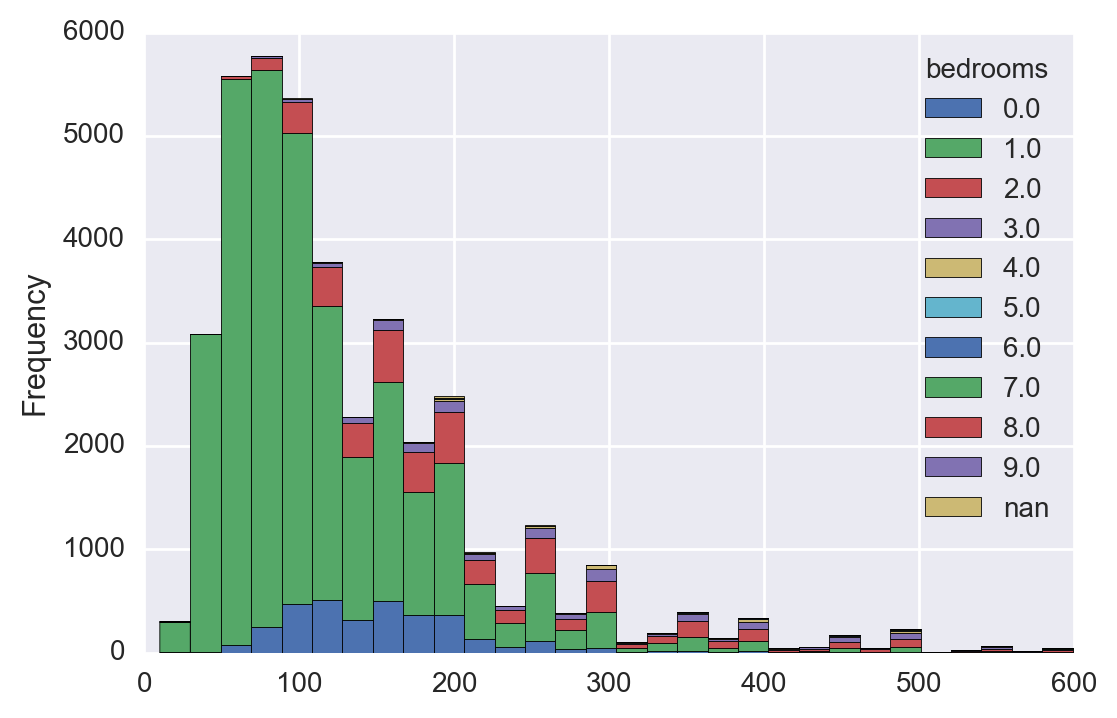

In [13]:
(train.pivot(columns = "bedrooms", values = "price")
         .plot.hist(bins = 30, stacked = True))

### Which features should we keep?

In [9]:
train.host_verifications.head()

0    ['email', 'phone', 'facebook', 'reviews', 'jum...
1                        ['email', 'phone', 'reviews']
2     ['email', 'phone', 'facebook', 'reviews', 'kba']
3               ['email', 'phone', 'reviews', 'jumio']
4               ['email', 'phone', 'reviews', 'jumio']
Name: host_verifications, dtype: object

In [10]:
train.host_identity_verified.value_counts()

t    26254
f    13376
Name: host_identity_verified, dtype: int64

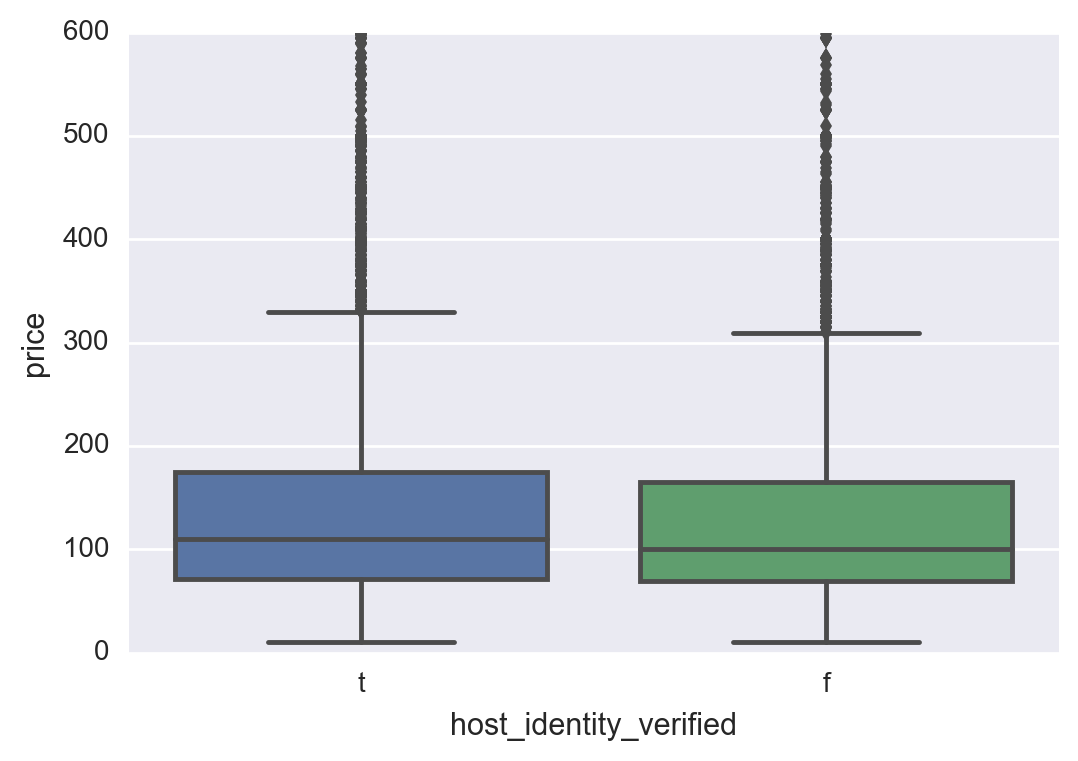

In [25]:
sns.boxplot(x = "host_identity_verified", y = "price", data = train)

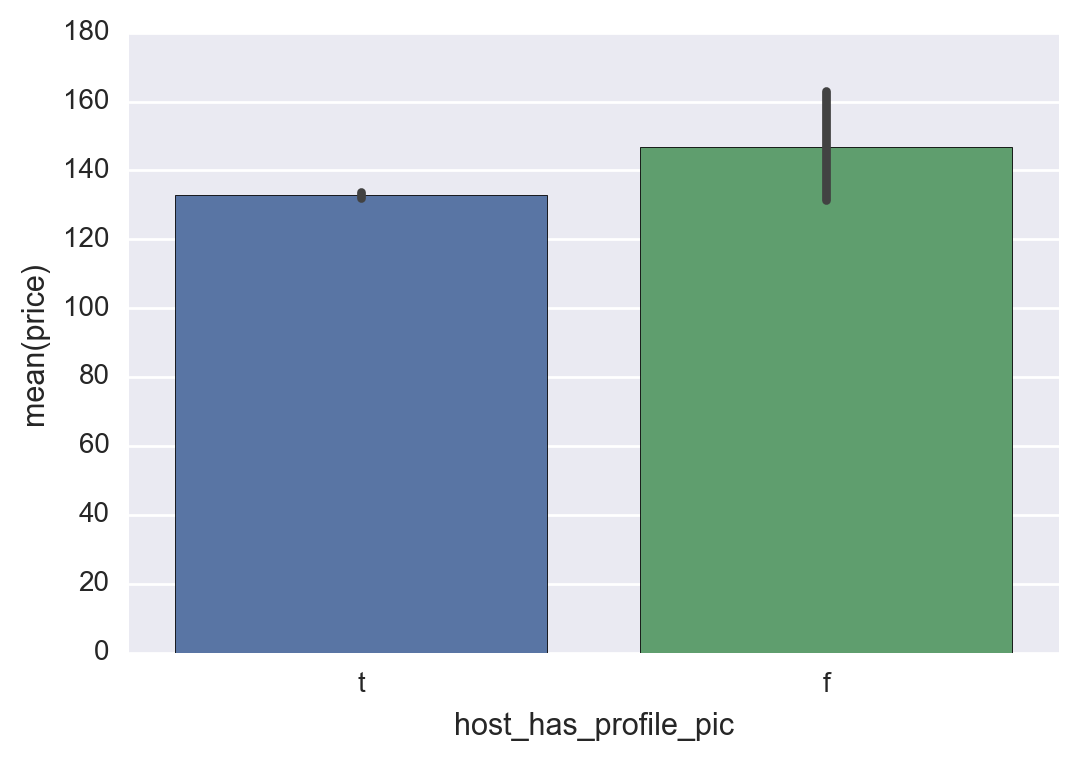

In [26]:
sns.barplot(x = "host_has_profile_pic", y = "price", data = train)

In [27]:
train["host_has_profile_pic"].value_counts()

t    39475
f      155
Name: host_has_profile_pic, dtype: int64

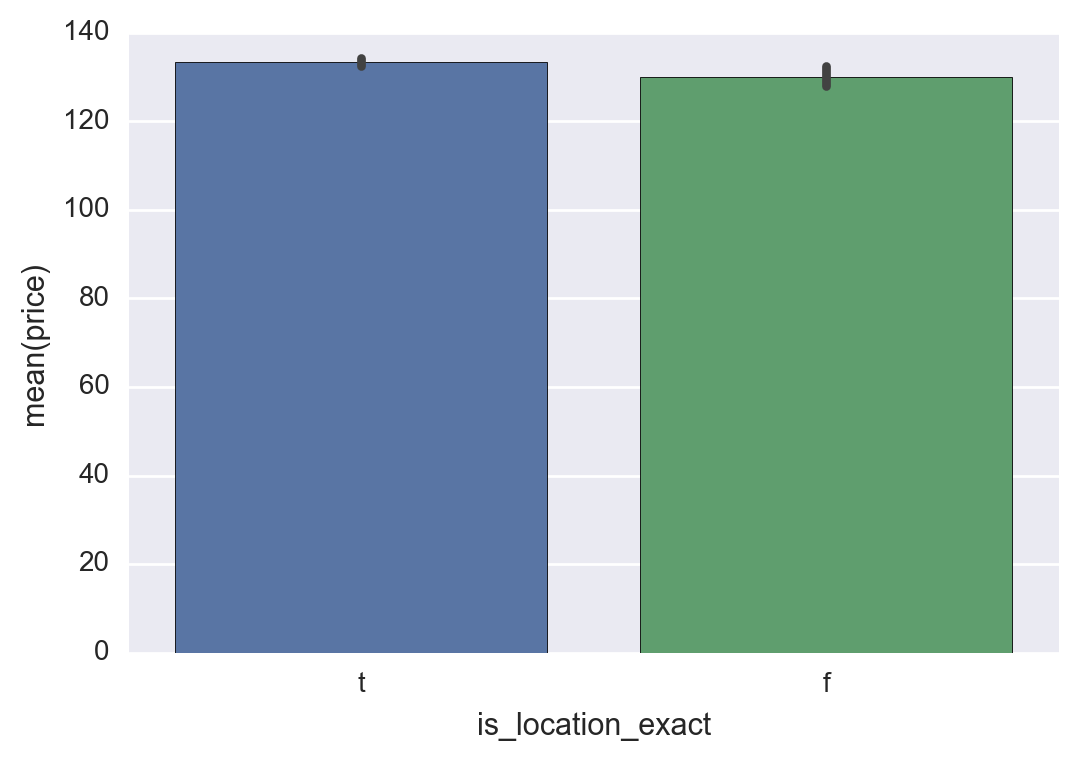

In [28]:
sns.barplot(x = "is_location_exact", y = "price", data = train)

In [29]:
['property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet']

['property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet']

### Property type obviously important for price:

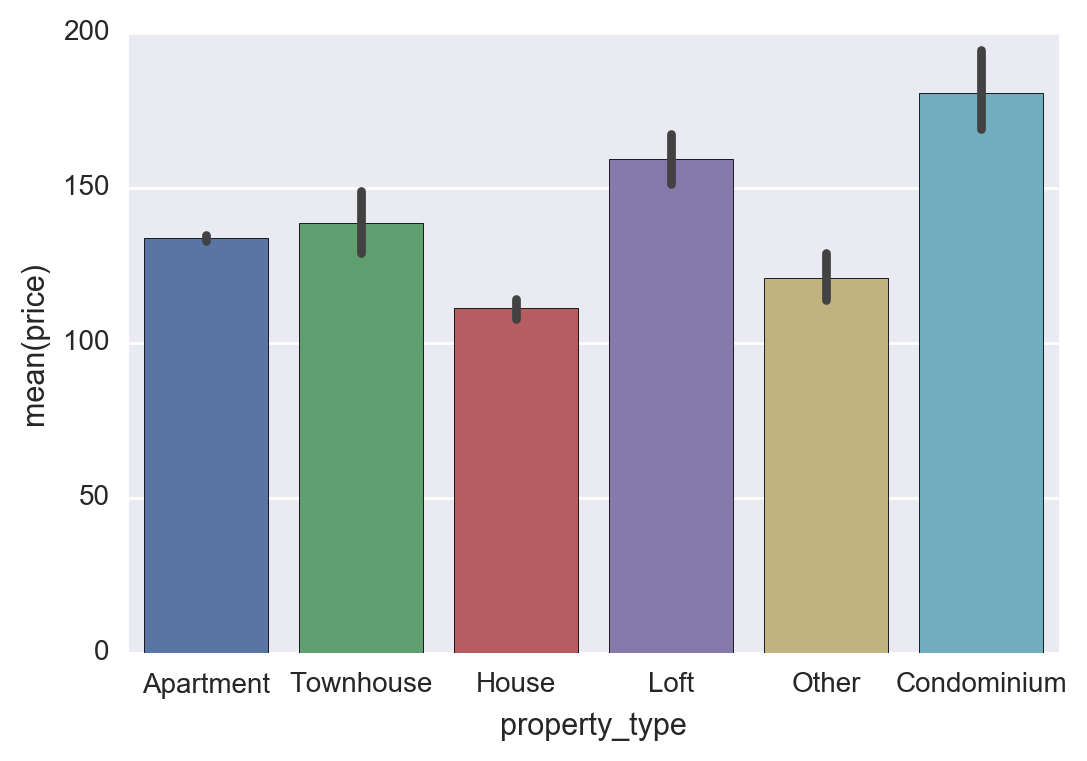

In [30]:
sns.barplot(x = "property_type", y = "price", data = train)

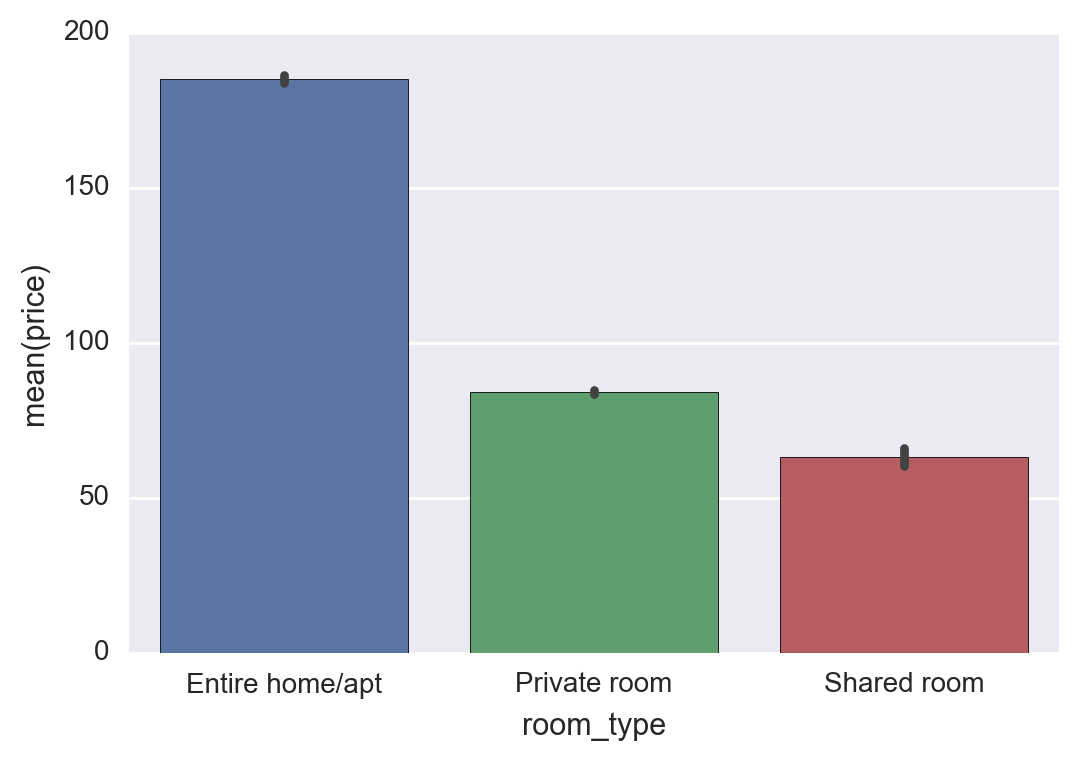

In [31]:
sns.barplot(x = "room_type", y = "price", data = train)

### Number of people Accomodated Important: 

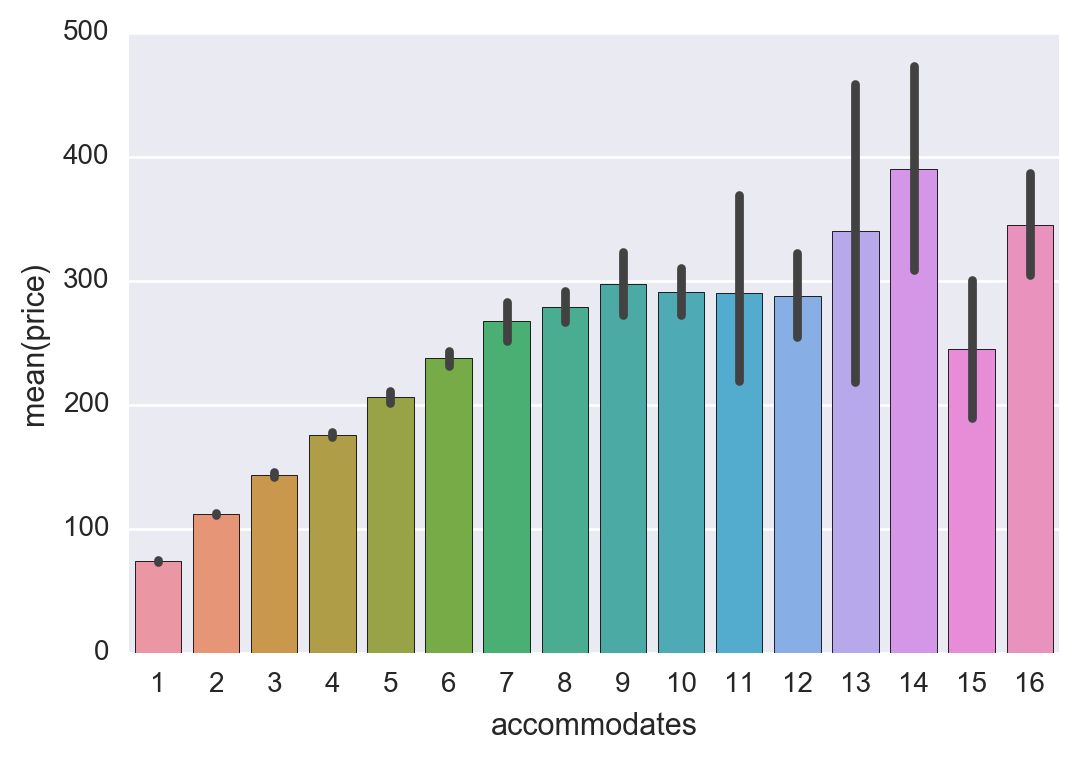

In [32]:
sns.barplot(x = "accommodates", y = "price", data = train)

### Bathrooms:

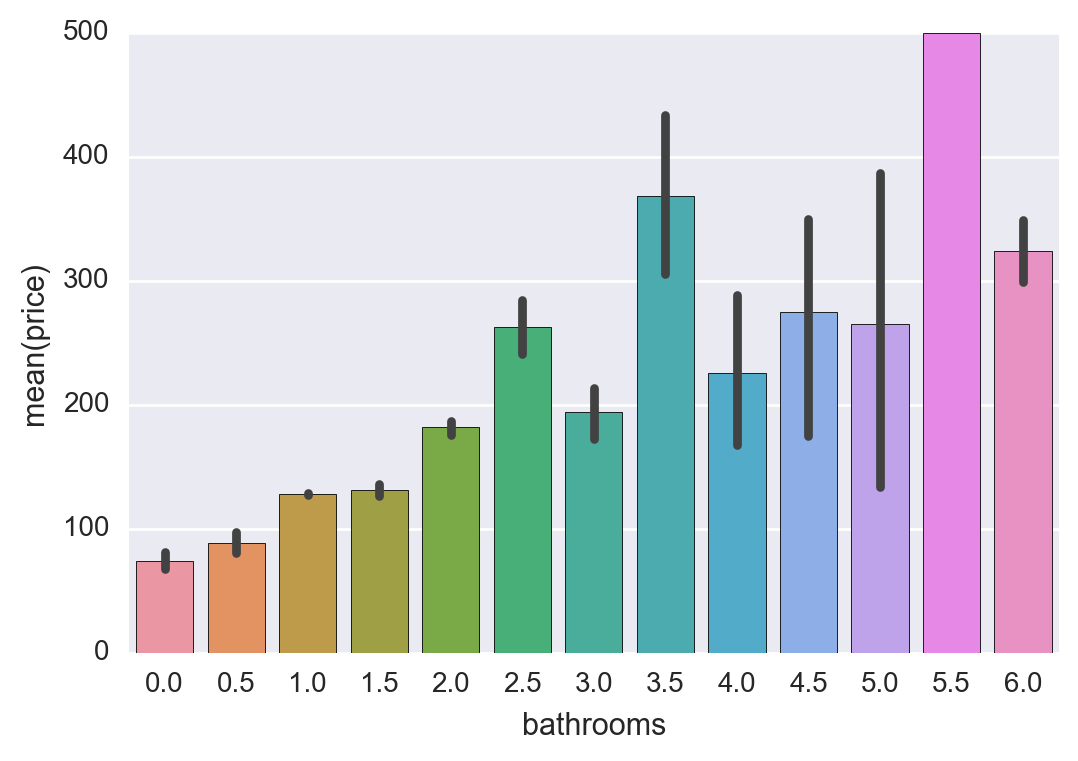

In [33]:
sns.barplot(x = "bathrooms", y = "price", data = train)

In [34]:
train["bathrooms"].value_counts()

1.0    34340
2.0     2703
1.5     1702
2.5      236
3.0      208
0.0      115
0.5      100
4.0       38
3.5       26
5.0        5
4.5        3
6.0        2
5.5        1
Name: bathrooms, dtype: int64

### Nr. of bedrooms also important - what's up with 0.0 being higher than 1.0?

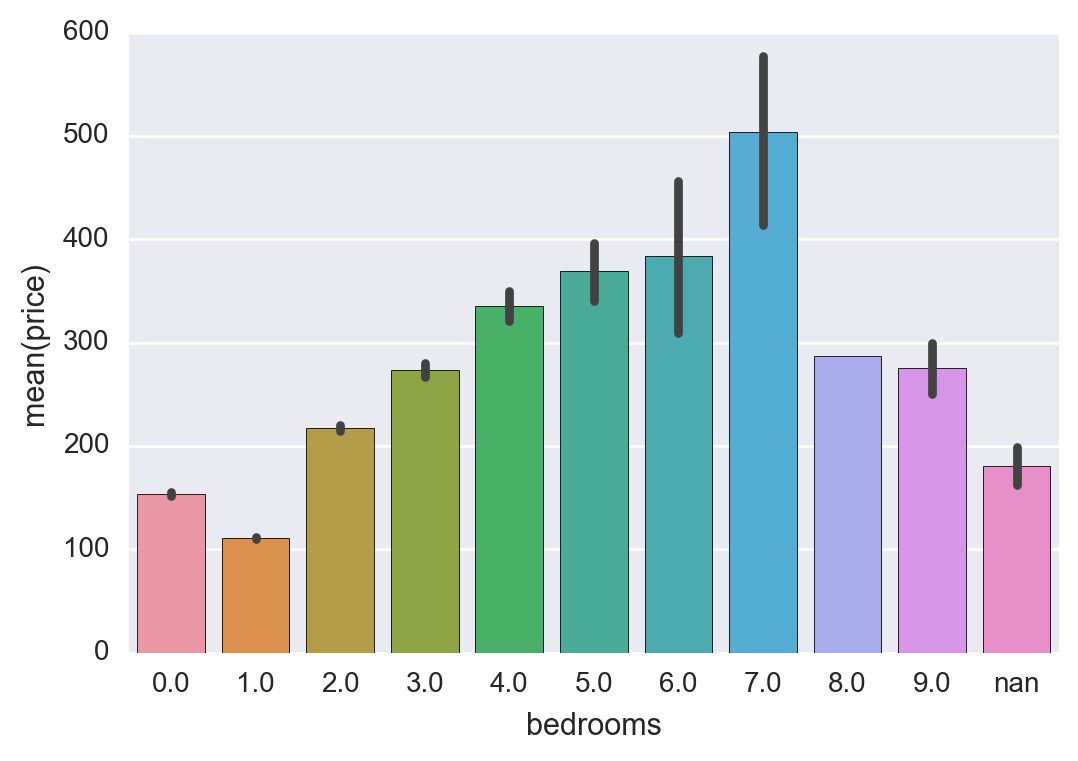

In [35]:
sns.barplot(x = "bedrooms", y = "price", data = train)

In [23]:
train["bedrooms"].value_counts()

1.0    30457
2.0     4370
0.0     3303
3.0     1151
4.0      245
nan       57
5.0       54
6.0       16
7.0        5
9.0        2
8.0        1
Name: bedrooms, dtype: int64

In [40]:
#too many nans for square feet.
train.square_feet.isnull().sum()

39058

In [ ]:
['review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']

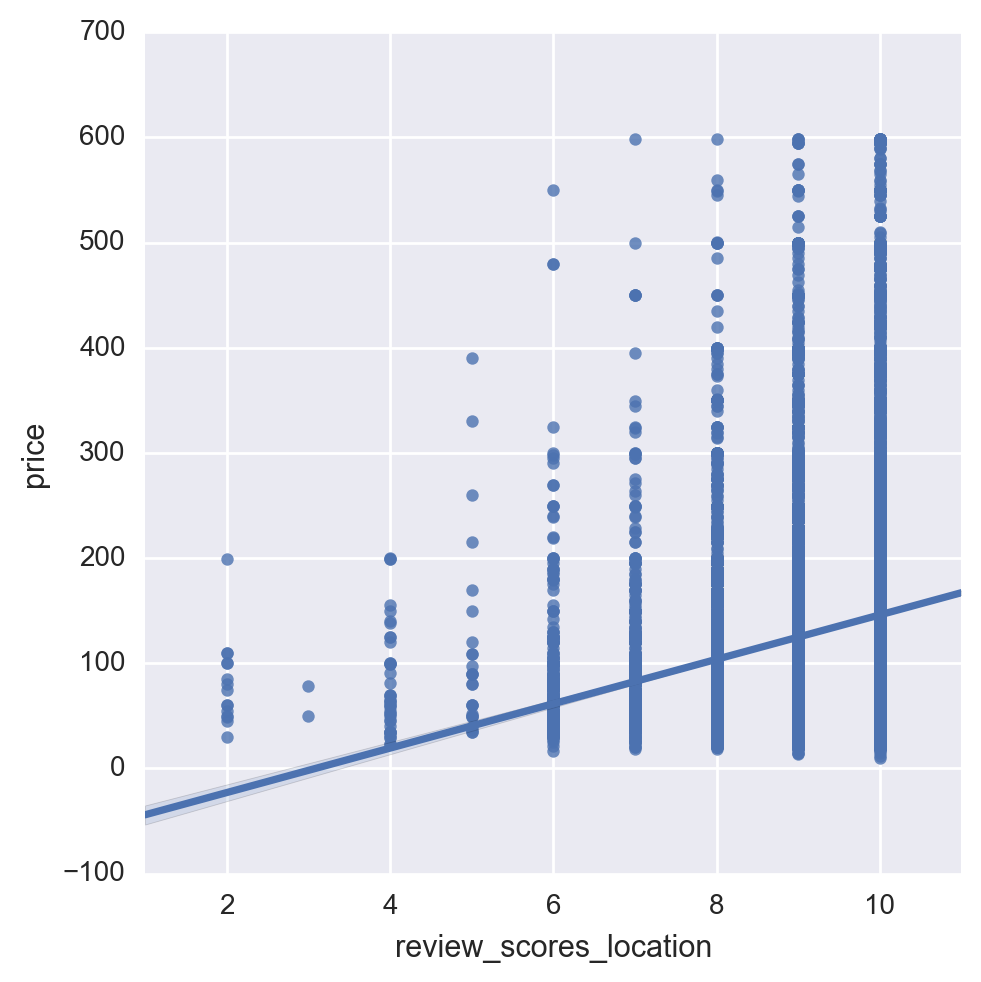

In [42]:
sns.lmplot("review_scores_location", "price", data = train)

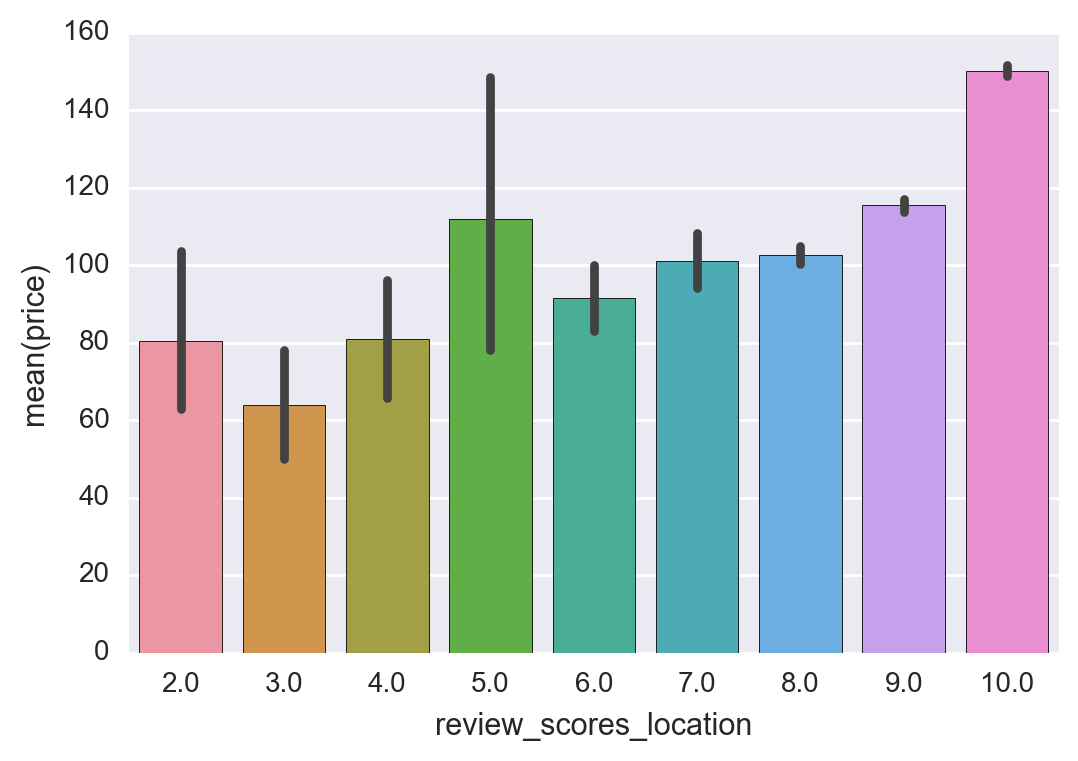

In [43]:
sns.barplot("review_scores_location", "price", data = train)

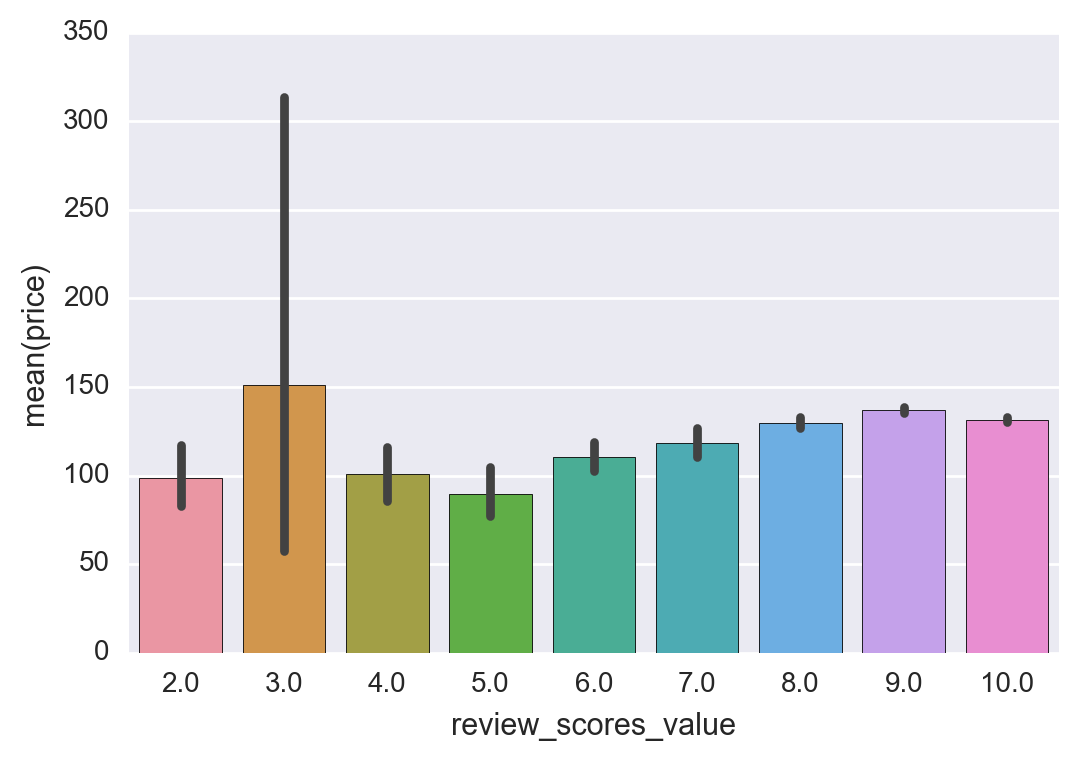

In [44]:
sns.barplot("review_scores_value", "price", data = train)

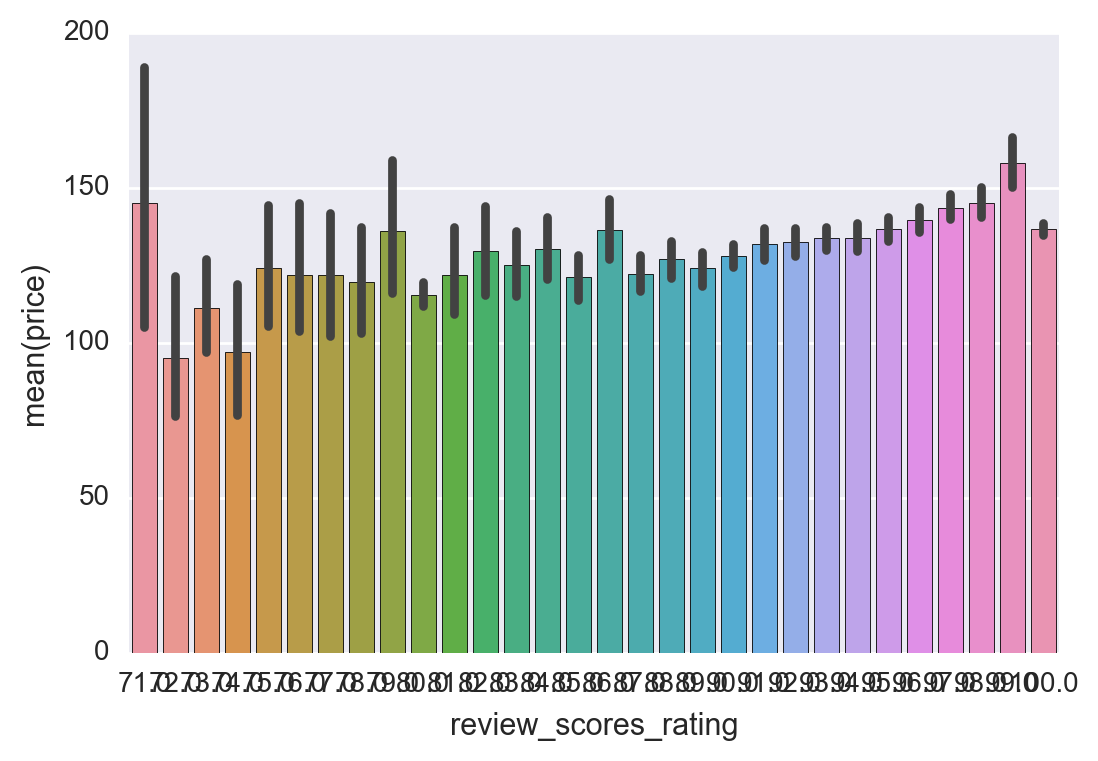

In [51]:
sns.barplot("review_scores_rating", "price", data = train.query("review_scores_rating > 70"))

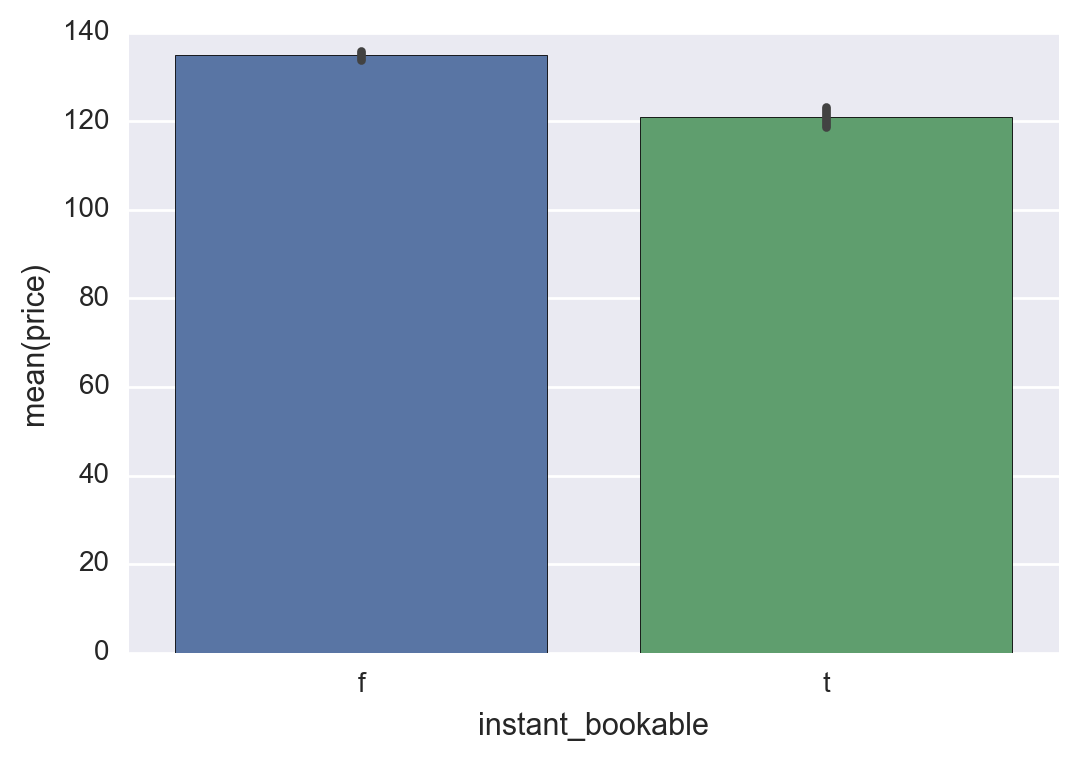

In [52]:
sns.barplot("instant_bookable", "price", data = train)

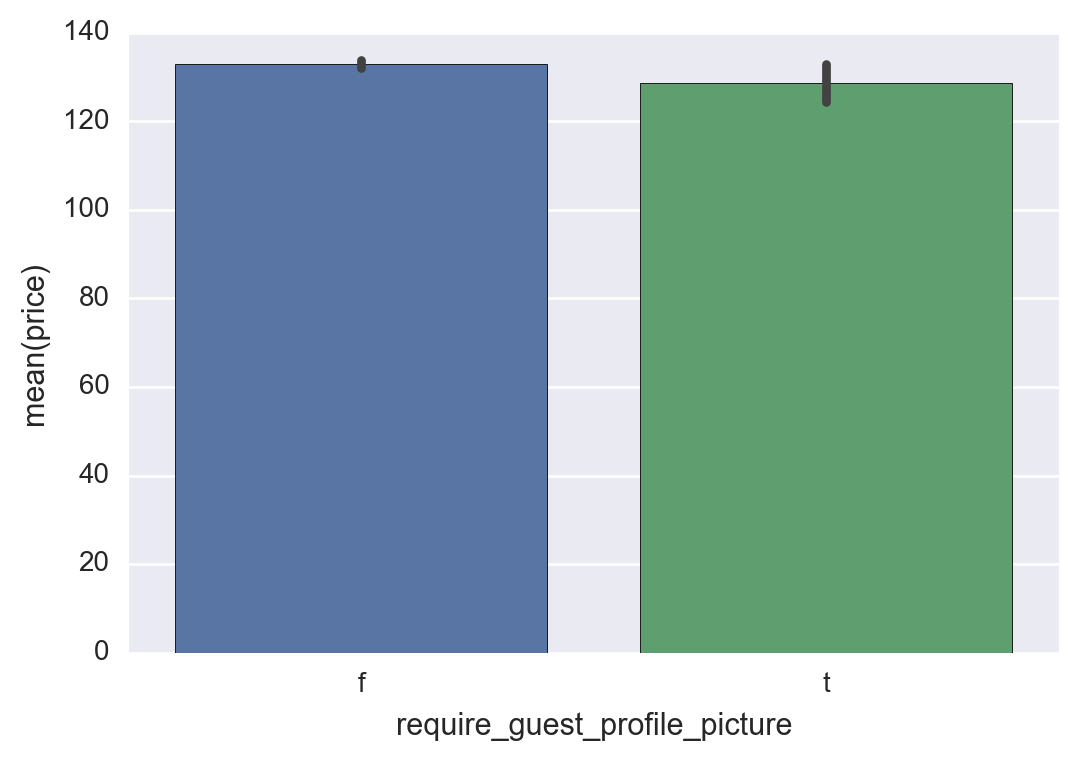

In [54]:
sns.barplot("require_guest_profile_picture", "price", data = train)